In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium

In [2]:
#Importing libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram , linkage
 
#Getting the data ready
#Selecting certain features based on which clustering is done
df1= pd.read_csv("FinalSprint1v2.csv")

df2= df1[["student_ratio", "school.mooe", "mooe_per_student"]]
df2

,student_ratio,school.mooe,mooe_per_student
0,37.190476,341000.0,436.619718
1,25.833333,275000.0,591.397849
2,25.000000,132000.0,754.285714
3,25.571429,135000.0,754.189944
4,30.111111,182000.0,671.586716
...,...,...,...
36036,39.952381,379000.0,451.728248
36037,49.750000,325000.0,408.291457
36038,82.025641,1003000.0,313.535480
36039,35.195652,684000.0,422.483014


In [3]:
ds = df2.isin([np.inf, -np.inf]).sort_values("student_ratio", ascending= False)
ds.groupby("mooe_per_student").size()

mooe_per_student
False    36039
True         2
dtype: int64

In [4]:
df = df2[np.isfinite(df2).all(1)]
df

,student_ratio,school.mooe,mooe_per_student
0,37.190476,341000.0,436.619718
1,25.833333,275000.0,591.397849
2,25.000000,132000.0,754.285714
3,25.571429,135000.0,754.189944
4,30.111111,182000.0,671.586716
...,...,...,...
36036,39.952381,379000.0,451.728248
36037,49.750000,325000.0,408.291457
36038,82.025641,1003000.0,313.535480
36039,35.195652,684000.0,422.483014


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled_ss = scaler.fit_transform(df)

In [6]:
print(df_scaled_ss.min())
print(df_scaled_ss.max())

-2.3775786917624675
34.7734245717847


In [7]:
df_scaled_ss

array([[-0.11969929,  0.56886082, -0.63173455],
       [-0.84020269,  0.28089798, -0.33113497],
       [-0.89306981, -0.34302149, -0.01478523],
       ...,
       [ 2.72466824,  3.45721532, -0.8707804 ],
       [-0.24625203,  2.06539495, -0.6591899 ],
       [ 0.06957158,  3.91097494, -0.704116  ]])

In [ ]:
#Linkage Matrix
Z = linkage(df_scaled_ss, method = 'ward')
#plotting dendrogram
dendro = dendrogram(Z)
plt.title('Dendrogram Ward')
plt.ylabel('Euclidean distance')
plt.axhline(y=15, color='r', linestyle='--')
plt.show()

In [111]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(df_scaled_ss))
ward_c = c
ward_c

0.8226303613177273

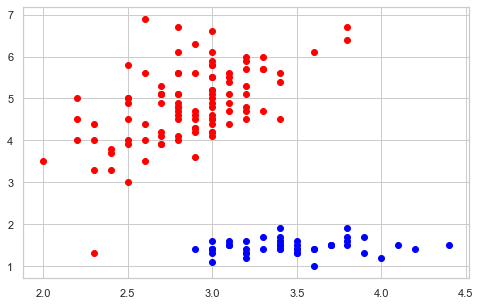

In [112]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
 
data = load_iris()
df = data.data
df = df[:,1:3]

agg_clustering = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
 
#predicting the labels
labels = agg_clustering.fit_predict(df_scaled_ss)
 
#Plotting the results
 
plt.figure(figsize = (8,5))
plt.scatter(df[labels == 0 , 0] , df[labels == 0 , 1] , c = 'red')
plt.scatter(df[labels == 1 , 0] , df[labels == 1 , 1] , c = 'blue')
plt.show()

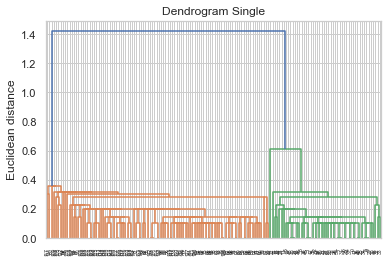

In [113]:
#Importing libraries
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram , linkage
 
data = load_iris()
df = data.data
df = df[:,1:3]
 
#Linkage Matrix
Z = linkage(df, method = 'single')
 
#plotting dendrogram
dendro = dendrogram(Z)
plt.title('Dendrogram Single')
plt.ylabel('Euclidean distance')
plt.show()

In [114]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(df_scaled_ss))
single_c = c
single_c

0.8050778130843238

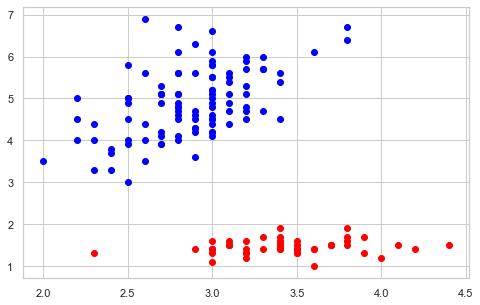

In [115]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
 
data = load_iris()
df = data.data
df = df[:,1:3]

agg_clustering = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'single')
 
#predicting the labels
labels = agg_clustering.fit_predict(df_scaled_ss)
 
#Plotting the results
 
plt.figure(figsize = (8,5))
plt.scatter(df[labels == 0 , 0] , df[labels == 0 , 1] , c = 'red')
plt.scatter(df[labels == 1 , 0] , df[labels == 1 , 1] , c = 'blue')
plt.show()

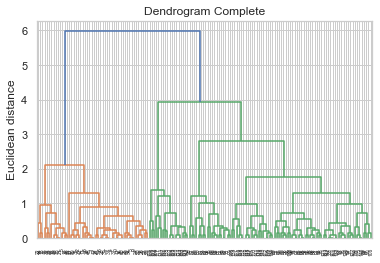

In [116]:
#Importing libraries
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram , linkage
 
data = load_iris()
df = data.data
df = df[:,1:3]
 
#Linkage Matrix
Z = linkage(df, method = 'complete')
 
#plotting dendrogram
dendro = dendrogram(Z)
plt.title('Dendrogram Complete')
plt.ylabel('Euclidean distance')
plt.show()

In [117]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(df_scaled_ss))
complete_c = c
complete_c

0.8266977962992434

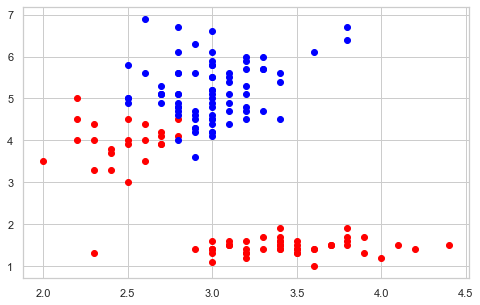

In [118]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
 
data = load_iris()
df = data.data
df = df[:,1:3]

agg_clustering = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'complete')
 
#predicting the labels
labels = agg_clustering.fit_predict(df_scaled_ss)
 
#Plotting the results
plt.figure(figsize = (8,5))
plt.scatter(df[labels == 0 , 0] , df[labels == 0 , 1] , c = 'red')
plt.scatter(df[labels == 1 , 0] , df[labels == 1 , 1] , c = 'blue')
plt.show()

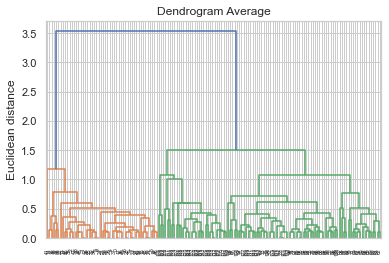

In [119]:
#Importing libraries
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram , linkage
 
data = load_iris()
df = data.data
df = df[:,1:3]
 
#Linkage Matrix
Z = linkage(df, method = 'average')
 
#plotting dendrogram
dendro = dendrogram(Z)
plt.title('Dendrogram Average')
plt.ylabel('Euclidean distance')
plt.show()

In [120]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(df_scaled_ss))
average_cophenet = c
average_cophenet

0.8258962007986093

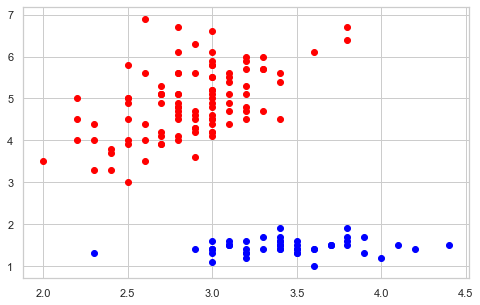

In [121]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
 
data = load_iris()
df = data.data
df = df[:,1:3]

agg_clustering = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'average')
 
#predicting the labels
labels = agg_clustering.fit_predict(df_scaled_ss)
 
#Plotting the results
plt.figure(figsize = (8,5))
plt.scatter(df[labels == 0 , 0] , df[labels == 0 , 1] , c = 'red')
plt.scatter(df[labels == 1 , 0] , df[labels == 1 , 1] , c = 'blue')
plt.show()

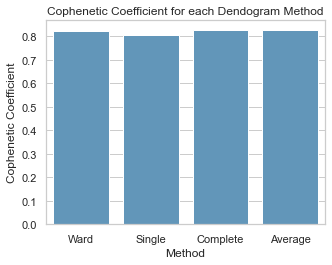

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")

fig = plt.figure(figsize=(5,3.75))
ax1 = sns.barplot(x=['Ward', 'Single', 'Complete', 'Average'], y=[ward_c, single_c, complete_c, average_cophenet],  
                  ci = None, color='#5499c7')
ax1.set_title('Cophenetic Coefficient for each Dendogram Method')
ax1.set(xlabel='Method', ylabel='Cophenetic Coefficient')        
plt.show()

In [131]:
max([ward_c, single_c, complete_c, average_cophenet])

0.8266977962992434

In [128]:
max([ward_c, single_c, complete_c, average_cophenet])

0.8266977962992434